# FIFA Dataset Segmentation

This notebook is about FIFA dataset.
The dataset contains the details of the players with their name, age, skill, reputation, country, club, potential, Position wise rating, skill wise rating etc. 
I am new to the world of football, so I tried my best to analyse the data.
The main purpose of this analysis is to segregate the data in a meaning full way.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,MiniBatchKMeans
import pdb

# Data input

In [2]:
fifa_df = pd.read_csv("./fifadataset.csv")

In [3]:
fifa_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa_df.shape

(18207, 89)

# Constants

In [5]:

to_be_removed = ['€']
to_be_multiplied = {"k" : 1000, "m": 1000000, "b" : 1000000000}
replace_body_type = {"Courtois" : "Lean", "C. Ronaldo" : "Normal","Neymar": "Normal","PLAYER_BODY_TYPE_25": "Normal",
                         "Shaqiri": "Normal","Akinfenwa": "Normal","Messi": "Stocky"}

# EDA 

In [6]:
fifa_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
fifa_df.Nationality.value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Uzbekistan                 2
Dominican Republic         2
Philippines                2
Nicaragua     

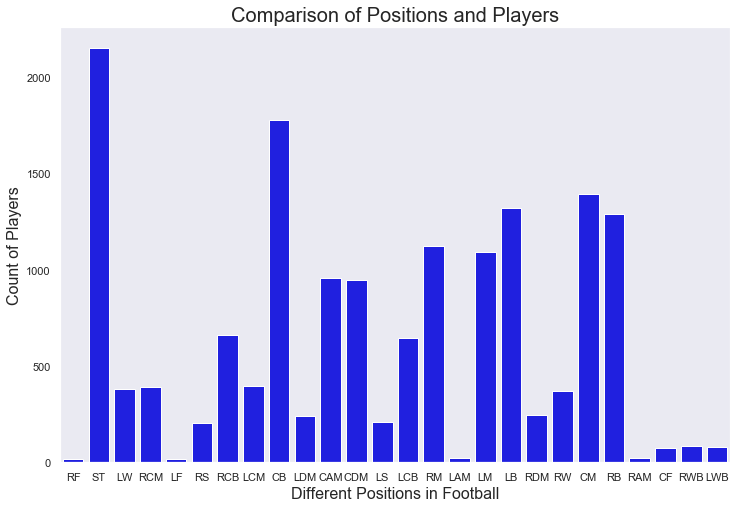

In [54]:
# different positions acquired by the players 

plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = fifa_df, color = 'blue')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()


Data contains more number of Strikers and center back players.

There is less number of players in the position RWB, LWB, Forward so there might be greater demand and the wages might be higher for players playing in these position

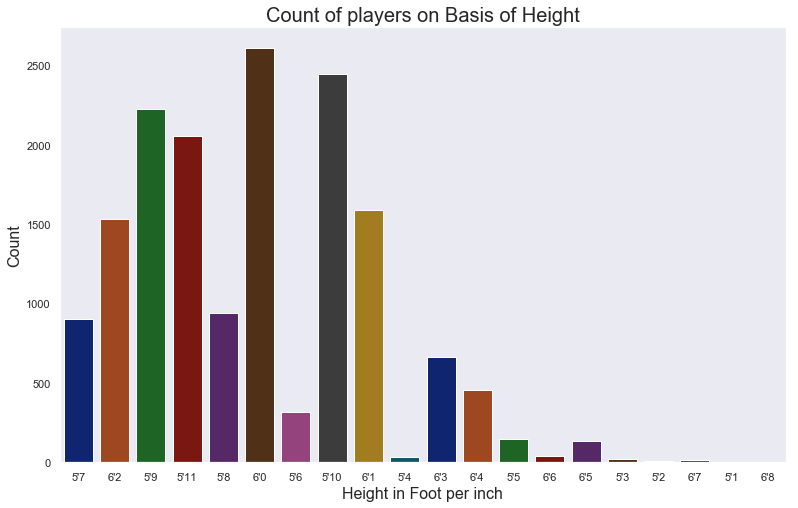

In [55]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = fifa_df, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

Football players normally are of height 5'7 to 6'1 

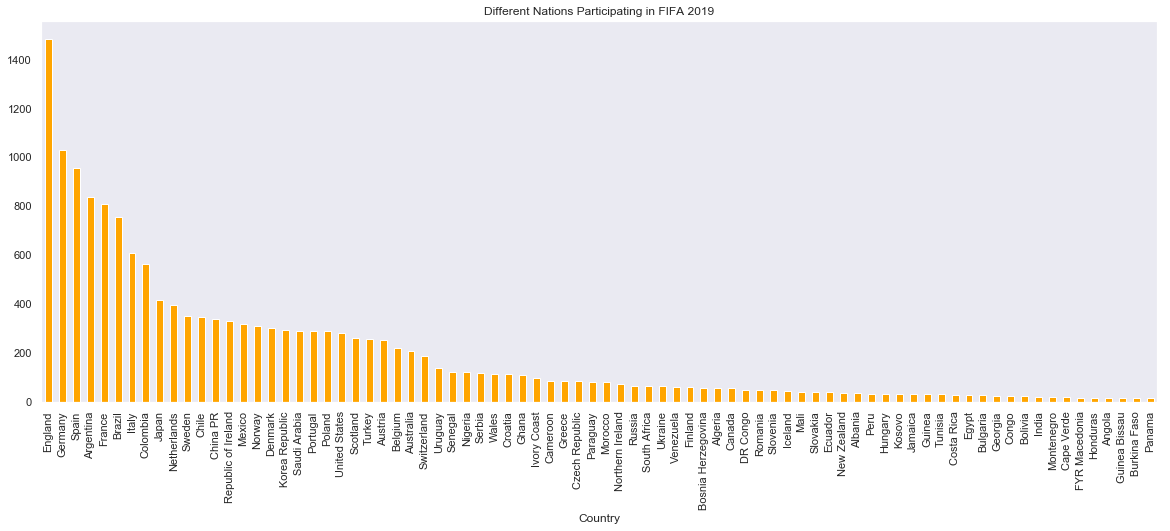

In [56]:
#Different nations participating in the FIFA

fifa_df['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Country')
plt.show()

England, Germany, Spain have maximum number of players

Text(0.5, 1.0, 'Comparison of Overall Scores and age wrt Preferred foot')

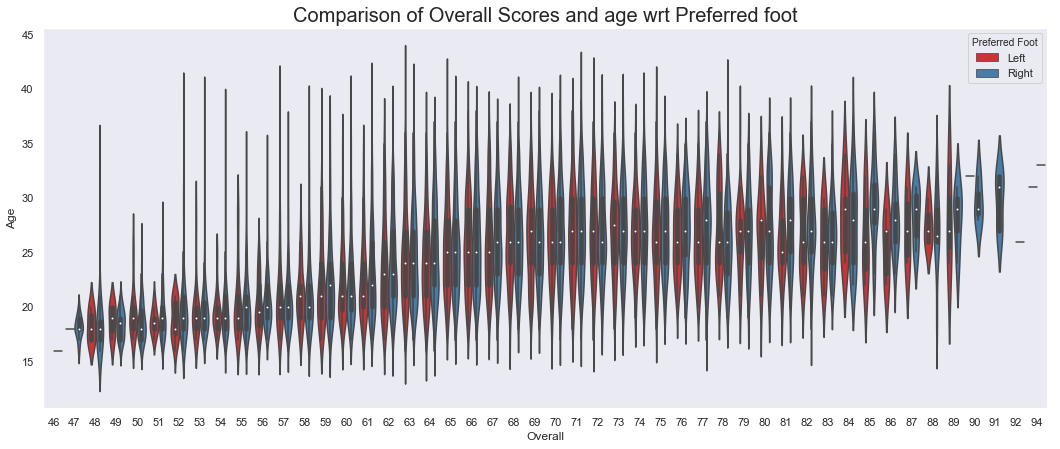

In [57]:
# violin plot 

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(fifa_df['Overall'], fifa_df['Age'], hue = fifa_df['Preferred Foot'], palette = 'Set1')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)

This is very interesting graph which says that the mean of the over all rating of players increase as the age of the player increases. There are certainly outliers for this but normally this graph shows that experience improves the game and there by the rating!!

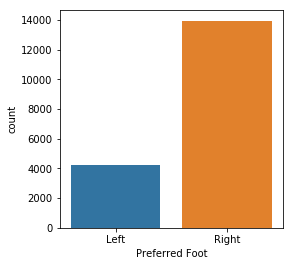

In [8]:
plt.figure(figsize = (4,4))
sns.countplot(x='Preferred Foot', data=fifa_df)

In the world, there are more number of players who play with their right foot as strong foot.

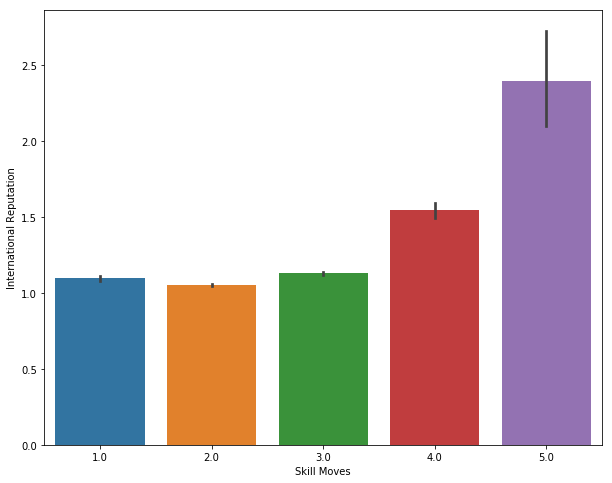

In [9]:
plt.figure(figsize = (10, 8))
sns.barplot(x='Skill Moves',y='International Reputation',data=fifa_df)

This confirms the fact that if the skill is high then the reputation would also be high

In [10]:
#Converting money into float

def convert_money(M, to_be_removed = to_be_removed, to_be_multiplied = to_be_multiplied):
    M = str(M).lower()
    for i in to_be_removed:
        M = M.replace(i,'')
    for j in to_be_multiplied.keys():
        if j in M:
            M = float(M.replace(j,''))*to_be_multiplied[j]
            break
    return float(M)

fifa_df.Wage = fifa_df.Wage.apply(lambda x: convert_money(x))
fifa_df.Value = fifa_df.Value.apply(lambda x: convert_money(x))
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(lambda x: convert_money(x))


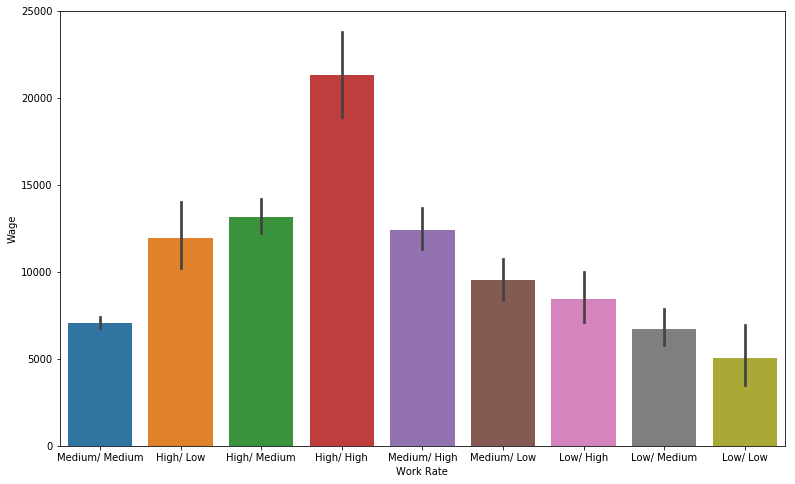

In [11]:
plt.figure(figsize = (13,8))
sns.barplot(x='Work Rate',y=fifa_df.Wage,data=fifa_df)

Again this is an interesting graph and throws light on how players are paid.

It also speaks that attackers are paid more than the defenders which confirms our assumtion stated above that the scarcity of forward players might help them earn more

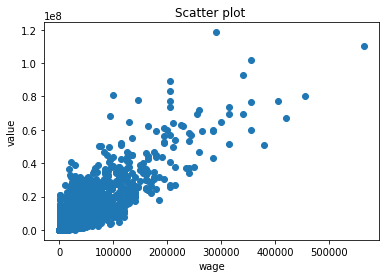

In [12]:
plt.scatter(fifa_df.Wage,fifa_df.Value)
plt.title("Scatter plot ")
plt.xlabel("wage")
plt.ylabel("value")
plt.show()

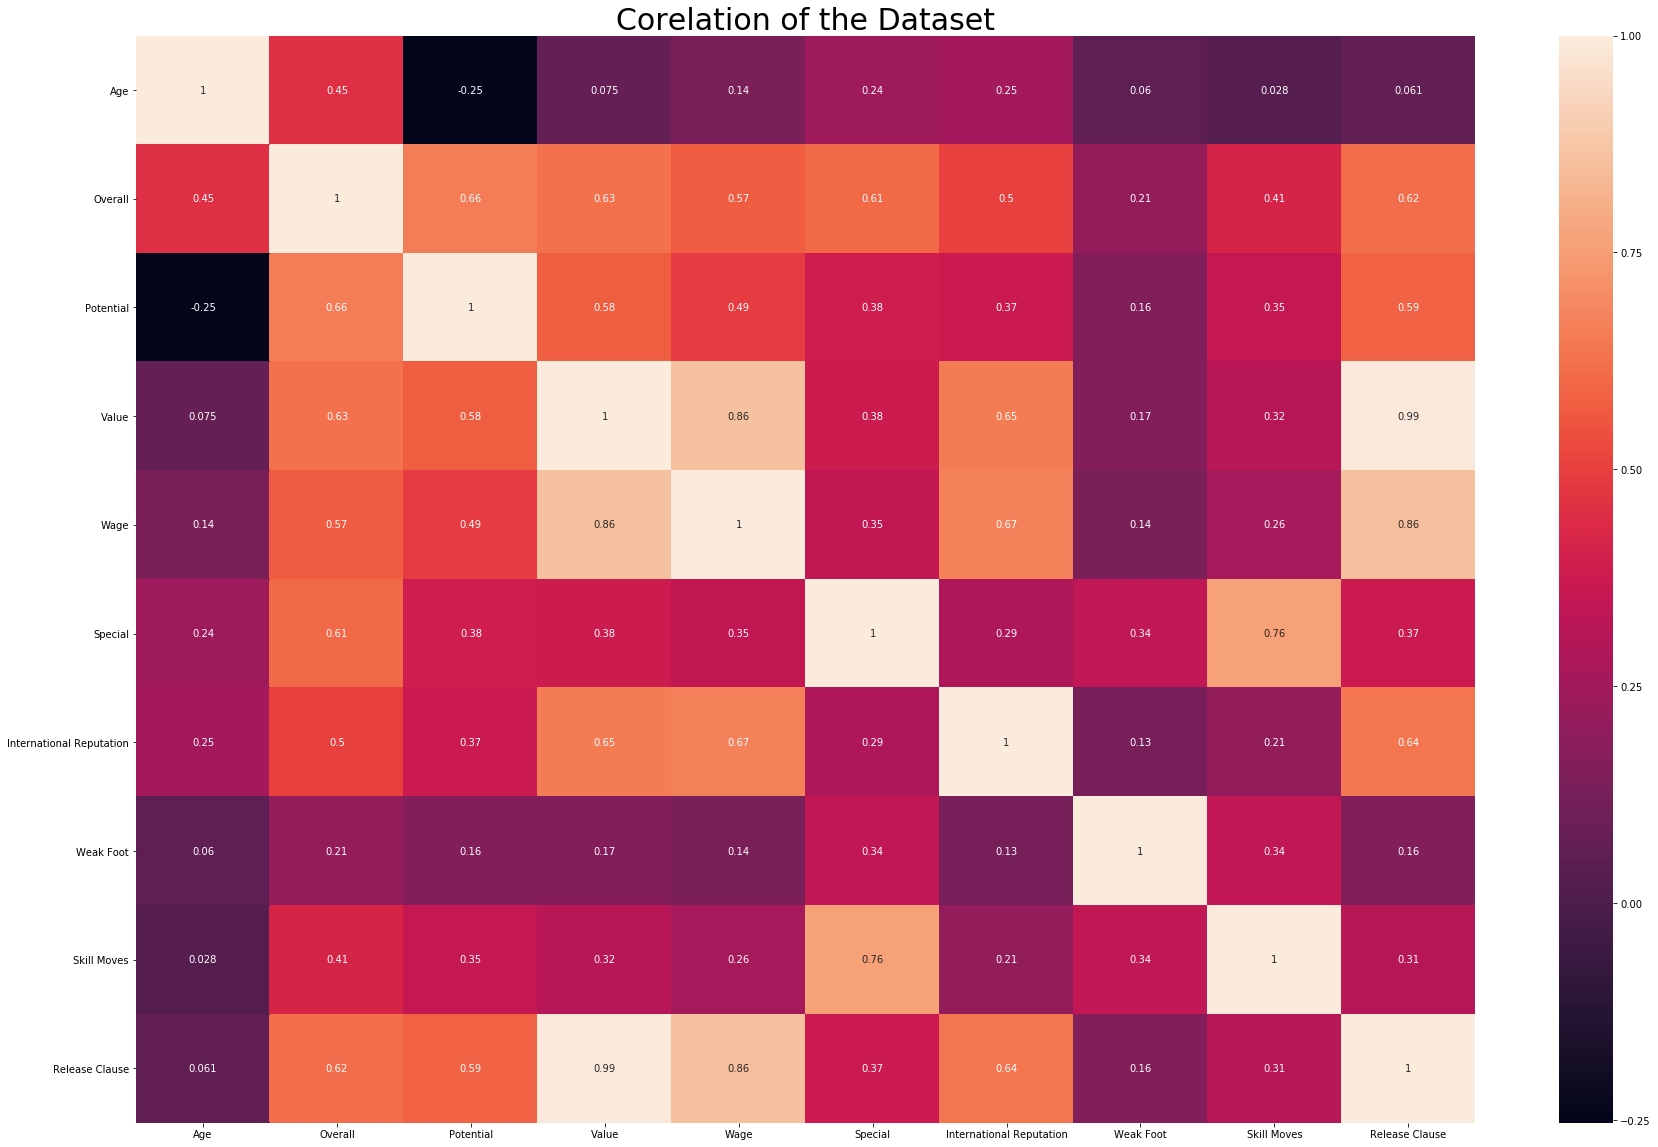

In [13]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(fifa_df[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 'Release Clause']].corr(), annot = True)

plt.title('Corelation of the Dataset', fontsize = 30)
plt.show()

I see a very interesting negative corelation between potential and age. Which means many players lose the contidence of the managers/ potential to perform in the next game as they are aged!!

Reputation of the player gets him more money than the overall rating of the player!!
Potential of the player also contributes in decides the money which he takes home!

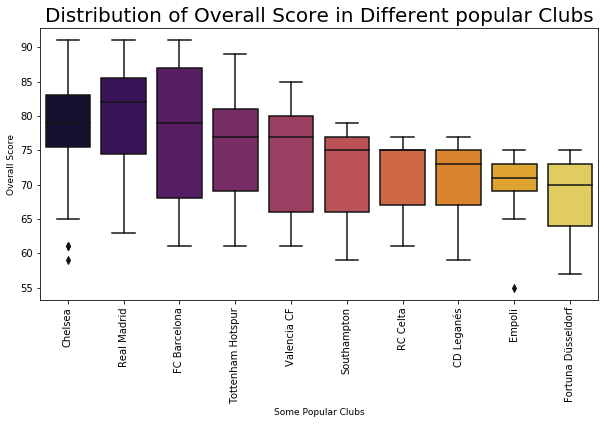

In [14]:
plt.figure(figsize = (10,5))
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = fifa_df.loc[fifa_df['Club'].isin(some_clubs) & fifa_df['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

This speaks that players in Chelsea are having over all score between 75-85 which means all the players are very good (Except 2 outliers). 

Real madrid has a right skewed graph which means though most of the players are good there are considerable number of low overall score players also.



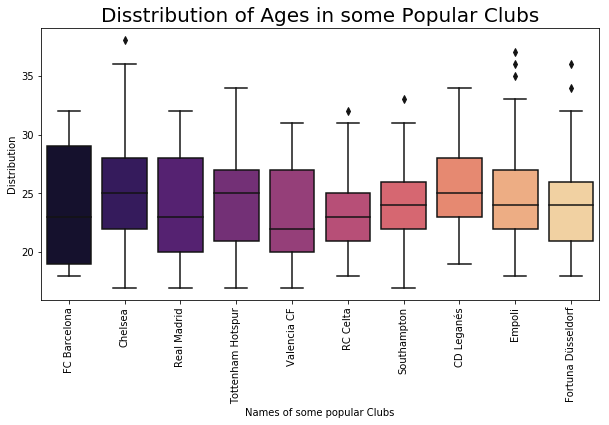

In [15]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = fifa_df.loc[fifa_df['Club'].isin(some_clubs) & fifa_df['Wage']]

plt.rcParams['figure.figsize'] = (10, 5)
ax = sns.boxplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

FC Barcelona has players of all age group.

Chelsea has players of mid aged(Football age).

Real Madrid has mostly young and some mid aged players.

# HOW TO APPROACH THE PROBLEM?

1. Decide on the perspective to segment : 

   I see there are 3 many aspects for this problem apart from the country and club. They are:
   
   A) Money
   B) Skill
   C) Position
   
       Value, Wage and Release Clause comes under Money.
   
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes' comes under Skills.
       
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB' comes under Position.
       
2. Data Cleaning: 
    
    A) This deals with droping the unwanted cloumns such as Name, id, Flag, photo etc. Dropping the coulmns is subjective to each of the analyst. I have tried here to drop the cloumns which are unique and columns which do not belong to Money, skill or position. 
    
    B) Cleaning the data ie., columns with special chars are processed to remove them to get float.
    
    C) Convert the categorical columns using one hot encoding.
    
    D) Treating missing values.
    
3. I would consider clustering as also segmentation where in we would be segmenting the data set based on multiple conditions using multiple columns.

4. Applying different types of clustering.

5. Checking if we have got a meaningful segments of the data set seperated out. If not we might have to look into a different approach.

6. Conclusion


# Data preparation

In [16]:
# Declaring diff types of columns

# Columns dealing with the position rating.
position_col = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

# Columns dealing with the skills.
skills_col = ['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

money_col = ['Value', 'Wage','Release Clause']

# Categorical columns.
cat_col = [ 'attack', 'defence']

# Column which can be used to derive different columns.
derivative_col = ['Work Rate']

# Colunms which can be dropped.
columns_drop = ['Unnamed: 0', 'ID', 'Name',"Photo","Flag",'Club Logo','Jersey Number',
                'Loaned From','Joined','Contract Valid Until','Weight','Nationality',
                'Club','Height','Weight','Position','Preferred Foot', 'Body Type', 'Real Face']

In [17]:
#Converting money into float

def convert_money(M, to_be_removed = to_be_removed, to_be_multiplied = to_be_multiplied):
    M = str(M).lower()
    for i in to_be_removed:
        M = M.replace(i,'')
    for j in to_be_multiplied.keys():
        if j in M:
            M = float(M.replace(j,''))*to_be_multiplied[j]
            break
    return float(M)

# Treating missing values.
def imputation(df):
    imp = SimpleImputer(strategy="most_frequent")
    return pd.DataFrame(df, columns=df.columns)

# As the columns such as value or wages are in millions, rating is in the range of 0-10 or 0-100. We see different ranges 
#from column to column so I have decided to scale all the columns.
def scaling(df):
    scale = StandardScaler()
    df_scaled = scale.fit_transform(df)

    df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
    
    return df_scaled, scale

# This is an optional function. This was created initially when I had considered all the columns for the analysis.
def pca_df(df):
    pca = PCA()
    df_pca = pca.fit_transform(df)
    
    return df_pca, pca

def plot(pca):
    n_components = min(np.where(np.cumsum(pca.explained_variance_ratio_)>0.99)[0]+1)

#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1],True)
#     ax2 = ax.twinx()
#     ax.plot(pca.explained_variance_ratio_, label='Variance',)
#     ax2.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative Variance',color = 'red');
#     ax.set_title('n_components needed for >100% explained variance: {}'.format(n_components));
#     ax.axvline(n_components, linestyle='dashed', color='black')
#     ax2.axhline(np.cumsum(pca.explained_variance_ratio_)[n_components], linestyle='dashed', color='black')
#     fig.legend(loc=(0.6,0.2));
#     fig.show()
#     plt.savefig("first.ps")
    return n_components

# Using KMeans.
def get_kmeans_score(data, center):
    
    print(center)
    
    kmeans = MiniBatchKMeans(n_clusters=center)

    model = kmeans.fit(data)
    
    score = np.abs(model.score(data))
    
    return score

def plot_kmeans(df):
    scores = []
    centers = list(range(1,30))
    for center in centers:
        scores.append(get_kmeans_score(df, center))
        
    plt.plot(centers, scores, linestyle='--', marker='o', color='b');
    plt.xlabel('K');
    plt.ylabel('SSE');
    plt.title('SSE vs. K');
    plt.show();
    plt.close();

In [18]:
#Converting the setps used for data preparation in to a function

def data_preparation(position_col, skills_col, cat_col, derivative_col, columns_drop, 
                     create_position_df = True, create_skill_df = True, create_money_df = True):
    
    # Dropping the rows with NAs in the position columns. This is because, there were consistant no of missing values
    # in all the columns so droping those rows.
    fifa_df.dropna(subset=position_col, axis=0, inplace=True)
    fifa_df.reset_index(inplace=True, drop=True)
    
    # Droping the columns which are decided above
    fifa_df_ = fifa_df.drop(columns_drop, axis=1)
    
    
    fifa_df_.Wage = fifa_df_.Wage.apply(lambda x: convert_money(x))
    fifa_df_.Value = fifa_df_.Value.apply(lambda x: convert_money(x))
    fifa_df_['Release Clause'] = fifa_df_['Release Clause'].apply(lambda x: convert_money(x))
    
    if 'Body Type' in fifa_df_.columns:
        fifa_df_['Body Type'] = fifa_df_['Body Type'].apply(lambda i: replace_body_type[i] if i in list(replace_body_type.keys()) else i)
    
    # Seperating out position as a seperate df
    position_df = fifa_df_[position_col]
    fifa_df_.drop(position_col, axis = 1, inplace = True)
    # Spliting the column into 2 parts. Assuming the first term as the rating of the player for that particular position,
    # I have considered the first part of each of the columns.
    for col in position_df.columns:
        position_df[col] = position_df[col].apply(lambda i : float(i.split("+")[0]))
    
#     if not create_position_df:
#         fifa_df_ = pd.concat([fifa_df_,position_df], axis=1)

    # Seperating out skill as a seperate df
    if create_skill_df:
        skill_df = fifa_df_[skills_col]
        fifa_df_.drop(skills_col, axis = 1, inplace = True)
        
    # Seperating out money as a seperate df
    if create_money_df:
        money_df = fifa_df_[money_col]
        fifa_df_.drop(money_col, axis = 1, inplace = True)
    
    
    fifa_df_['Work Rate'] = fifa_df_['Work Rate'].apply(lambda i : i.replace(" ","").split("/") if type(i) == str else ["Low","Low"])
    new_work_rate_col = ['attack','defence']
    fifa_df_[new_work_rate_col] = pd.DataFrame(fifa_df_['Work Rate'].tolist(), index= fifa_df_.index)
    fifa_df_.drop(['Work Rate'], axis = 1, inplace=True)
    cat_col = cat_col
    
    if "Height" in fifa_df_.columns:
        fifa_df_.Height = fifa_df_.Height.fillna("5'5")
        fifa_df_.Height = fifa_df_.Height.apply(lambda i : float(i.replace("'",".")))
        
    fifa_df_cat_con = pd.get_dummies(fifa_df_, prefix=cat_col, columns=cat_col, drop_first=True)
    
    fifa_df_cat_con_imp = imputation(fifa_df_cat_con.copy())
    
    df_scaled, scale = scaling(fifa_df_cat_con_imp.copy())

    return df_scaled, skill_df, position_df, money_df, scale

In [19]:
df_scaled, skill_df, position_df, money_df, scale = data_preparation(position_col, skills_col, cat_col, derivative_col, columns_drop, 
                     create_position_df = True, create_skill_df = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


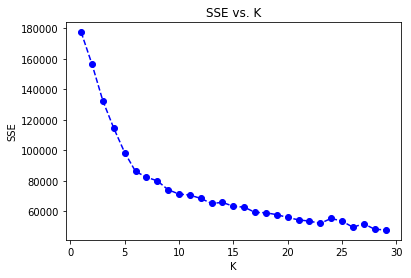

In [14]:
plot_kmeans(df_scaled)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


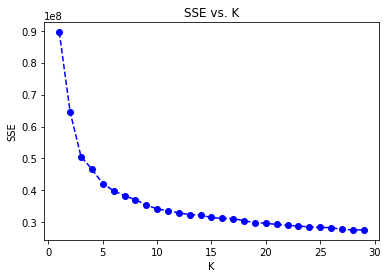

In [15]:
plot_kmeans(skill_df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


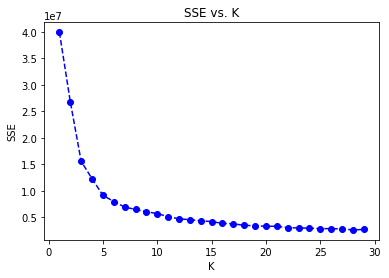

In [16]:
plot_kmeans(position_df)

In [39]:
money_df = money_df.fillna(money_df.mean())

In [40]:
money_df.isna().sum()

Value             0
Wage              0
Release Clause    0
dtype: int64

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


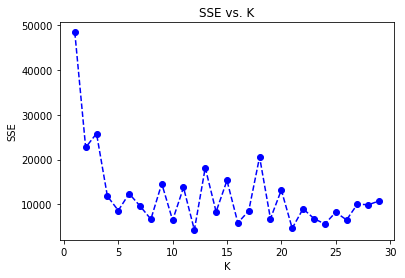

In [41]:
money_df_imp_scale,_ = scaling(money_df)
plot_kmeans(money_df_imp_scale)

Looing at the graph, clustering over money related columns might not be a good idea

# Clustering

In [47]:
kmeans_k = KMeans(5)
model_k = kmeans_k.fit(df_scaled)
prediction = model_k.predict(df_scaled)

In [48]:
df_scaled_inv = pd.DataFrame(scale.inverse_transform(df_scaled), columns=df_scaled.columns)
df_scaled_inv["Group"] = prediction

In [49]:
df_scaled_inv.shape

(16122, 12)

In [50]:
df_scaled_inv.Group.value_counts()

1    6588
3    5887
0    1444
4    1289
2     914
Name: Group, dtype: int64

In [51]:
df_scaled.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'attack_Low', 'attack_Medium',
       'defence_Low', 'defence_Medium'],
      dtype='object')

In [52]:
df_scaled_inv[df_scaled_inv["Group"] == 1]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,attack_Low,attack_Medium,defence_Low,defence_Medium,Group
868,28.0,77.0,77.0,1500.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,1
1367,27.0,76.0,78.0,1478.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,1
1488,26.0,75.0,79.0,1431.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,1
1775,25.0,75.0,77.0,1557.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1
1938,24.0,74.0,76.0,1481.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,1
1986,26.0,74.0,74.0,1641.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,1
2127,22.0,74.0,81.0,1538.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1
2169,27.0,74.0,76.0,1483.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1
2189,23.0,74.0,81.0,1464.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,1
2214,31.0,74.0,74.0,1439.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,1


In [53]:
df_scaled_inv[df_scaled_inv["Group"] == 2]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,attack_Low,attack_Medium,defence_Low,defence_Medium,Group
209,23.0,82.0,86.0,1705.0,2.0,3.0,2.0,1.0,0.0,0.0,1.0,2
228,27.0,82.0,83.0,1959.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2
260,29.0,82.0,82.0,1945.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,2
292,22.0,81.0,88.0,1717.0,2.0,3.0,2.0,1.0,0.0,0.0,1.0,2
304,25.0,81.0,84.0,1821.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2
363,21.0,80.0,85.0,1806.0,1.0,3.0,3.0,1.0,0.0,0.0,1.0,2
455,31.0,80.0,80.0,1792.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,2
574,27.0,79.0,79.0,1923.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,2
619,28.0,79.0,79.0,1991.0,2.0,3.0,3.0,1.0,0.0,0.0,0.0,2
666,21.0,78.0,86.0,1738.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,2


In [54]:
df_scaled_inv[df_scaled_inv["Group"] == 3]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,attack_Low,attack_Medium,defence_Low,defence_Medium,Group
67,23.0,85.0,92.0,1800.0,1.0,4.0,2.0,0.0,1.0,0.0,0.0,3
138,26.0,83.0,83.0,2095.0,1.0,4.0,4.0,0.0,0.0,0.0,1.0,3
139,26.0,83.0,83.0,1894.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,3
155,26.0,83.0,85.0,1967.0,1.0,4.0,4.0,0.0,0.0,0.0,1.0,3
194,22.0,82.0,87.0,2055.0,1.0,3.0,4.0,0.0,1.0,0.0,0.0,3
195,21.0,82.0,90.0,2120.0,1.0,3.0,4.0,0.0,1.0,0.0,1.0,3
196,30.0,82.0,82.0,2061.0,1.0,4.0,2.0,0.0,0.0,0.0,1.0,3
197,34.0,82.0,82.0,2003.0,1.0,3.0,2.0,0.0,0.0,0.0,1.0,3
202,22.0,82.0,88.0,1953.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,3
203,23.0,82.0,88.0,1775.0,1.0,4.0,2.0,0.0,1.0,0.0,0.0,3


In [55]:
df_scaled_inv[df_scaled_inv["Group"] == 4]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,attack_Low,attack_Medium,defence_Low,defence_Medium,Group
0,31.0,94.0,94.0,2202.0,5.0,4.0,4.0,0.0,1.0,0.0,1.0,4
1,33.0,94.0,94.0,2228.0,5.0,4.0,5.0,0.0,0.0,1.0,0.0,4
2,26.0,92.0,93.0,2143.0,5.0,5.0,5.0,0.0,0.0,0.0,1.0,4
3,27.0,91.0,92.0,2281.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,4
4,27.0,91.0,91.0,2142.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,4
5,32.0,91.0,91.0,2280.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,4
6,31.0,91.0,91.0,2346.0,5.0,4.0,3.0,0.0,0.0,0.0,1.0,4
7,32.0,91.0,91.0,2201.0,4.0,3.0,3.0,0.0,0.0,0.0,1.0,4
8,29.0,90.0,90.0,2152.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,4
9,28.0,90.0,90.0,2190.0,4.0,5.0,3.0,0.0,1.0,0.0,1.0,4


In [56]:
df_scaled_inv[df_scaled_inv["Group"] == 0]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,attack_Low,attack_Medium,defence_Low,defence_Medium,Group
140,26.0,83.0,83.0,1921.0,1.0,3.0,4.0,0.0,0.0,1.0,0.0,0
199,21.0,82.0,86.0,2006.0,1.0,3.0,4.0,0.0,0.0,1.0,0.0,0
291,23.0,81.0,87.0,2047.0,1.0,4.0,4.0,0.0,1.0,1.0,0.0,0
408,30.0,80.0,80.0,2006.0,1.0,4.0,4.0,0.0,0.0,1.0,0.0,0
451,31.0,80.0,80.0,2018.0,1.0,3.0,4.0,0.0,1.0,1.0,0.0,0
662,25.0,78.0,82.0,1926.0,1.0,2.0,4.0,0.0,0.0,1.0,0.0,0
682,25.0,78.0,79.0,2009.0,1.0,3.0,4.0,0.0,0.0,1.0,0.0,0
693,25.0,78.0,81.0,1977.0,1.0,5.0,4.0,0.0,1.0,1.0,0.0,0
710,25.0,78.0,80.0,1876.0,2.0,2.0,4.0,0.0,1.0,1.0,0.0,0
715,23.0,78.0,84.0,1826.0,1.0,4.0,4.0,0.0,1.0,1.0,0.0,0


In [58]:
4
3
0
2
1

2

This is an insteresting cluster which has been formed based on Age, Overall, Potential, Special, International Reputation, Weak Foot, Skill Moves, attack_Low, attack_Medium, defence_Low, defence_Medium.
Cluster 4 and cluster 3 represent the players who are desired by every club to have or country. They have high over all rating, they have a good potential to perform, their reputation is also good and they are skilled amazingly well even in using their weak foot. They are also good in attack and also even defence. so they are the players who would be match winner. Even among these two clusters, cluster 4 contains the best players because they have very high over all rating and potential.

Players in Cluster 0 are the players have good Overall rating and have good potential but their reputation is not good. They are generally good in attack but not good in defence.

Players in Cluster 2 and Cluster 1 are having bad reputation, not great skills also their weak foot is actually weak. Cluster 2 players are not attackers and also their defence is medium

In [59]:
kmeans_k = KMeans(5)
model_k = kmeans_k.fit(skill_df)
prediction = model_k.predict(skill_df)

In [60]:
skill_df_grp = skill_df.copy()
skill_df_grp["Group"] = prediction

In [61]:
skill_df_grp[skill_df_grp["Group"] == 0]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Group
940,39.0,78.0,90.0,65.0,70.0,68.0,68.0,36.0,35.0,76.0,...,74.0,30.0,13.0,12.0,14.0,11.0,10.0,13.0,7.0,0
1478,30.0,75.0,79.0,69.0,68.0,66.0,56.0,30.0,42.0,74.0,...,71.0,28.0,24.0,21.0,9.0,15.0,15.0,14.0,6.0,0
1809,35.0,77.0,76.0,62.0,60.0,67.0,43.0,22.0,21.0,69.0,...,64.0,21.0,18.0,20.0,12.0,9.0,8.0,12.0,7.0,0
1966,32.0,78.0,71.0,64.0,65.0,70.0,45.0,33.0,54.0,74.0,...,74.0,20.0,15.0,15.0,6.0,12.0,7.0,5.0,14.0,0
2134,51.0,77.0,73.0,64.0,43.0,66.0,47.0,40.0,35.0,73.0,...,69.0,33.0,38.0,24.0,10.0,15.0,10.0,6.0,13.0,0
2142,36.0,79.0,76.0,63.0,60.0,66.0,38.0,40.0,43.0,67.0,...,69.0,44.0,25.0,19.0,10.0,14.0,15.0,9.0,8.0,0
2157,33.0,74.0,75.0,67.0,62.0,75.0,37.0,27.0,32.0,70.0,...,68.0,38.0,37.0,31.0,6.0,8.0,15.0,5.0,8.0,0
2315,33.0,78.0,84.0,58.0,60.0,60.0,43.0,32.0,33.0,74.0,...,55.0,30.0,25.0,29.0,7.0,10.0,10.0,10.0,8.0,0
2448,26.0,75.0,78.0,57.0,61.0,53.0,29.0,48.0,23.0,68.0,...,74.0,22.0,14.0,12.0,11.0,9.0,7.0,13.0,15.0,0
2468,33.0,76.0,79.0,57.0,63.0,66.0,53.0,33.0,35.0,68.0,...,61.0,35.0,22.0,16.0,7.0,10.0,15.0,11.0,12.0,0


In [62]:
skill_df_grp[skill_df_grp["Group"] == 1]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Group
36,30.0,19.0,81.0,66.0,14.0,66.0,28.0,28.0,56.0,60.0,...,78.0,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,1
77,27.0,10.0,80.0,60.0,16.0,54.0,30.0,10.0,61.0,65.0,...,79.0,86.0,87.0,89.0,8.0,6.0,8.0,15.0,12.0,1
99,47.0,37.0,81.0,68.0,30.0,47.0,36.0,44.0,58.0,56.0,...,73.0,88.0,86.0,87.0,9.0,11.0,7.0,10.0,15.0,1
103,30.0,20.0,86.0,78.0,31.0,42.0,28.0,30.0,63.0,63.0,...,72.0,82.0,85.0,83.0,15.0,7.0,14.0,7.0,15.0,1
146,35.0,20.0,80.0,74.0,24.0,55.0,30.0,27.0,69.0,64.0,...,75.0,80.0,88.0,84.0,11.0,8.0,7.0,9.0,14.0,1
160,35.0,34.0,85.0,72.0,27.0,47.0,34.0,28.0,69.0,68.0,...,75.0,86.0,83.0,84.0,14.0,13.0,14.0,13.0,12.0,1
177,29.0,27.0,85.0,63.0,17.0,51.0,35.0,26.0,59.0,59.0,...,79.0,82.0,85.0,82.0,10.0,14.0,5.0,8.0,10.0,1
209,40.0,33.0,80.0,65.0,35.0,64.0,45.0,25.0,59.0,65.0,...,70.0,87.0,86.0,82.0,5.0,10.0,5.0,5.0,5.0,1
237,17.0,42.0,80.0,72.0,39.0,64.0,39.0,19.0,70.0,62.0,...,74.0,84.0,85.0,85.0,16.0,13.0,15.0,16.0,13.0,1
264,44.0,41.0,89.0,64.0,35.0,48.0,46.0,37.0,62.0,72.0,...,86.0,85.0,85.0,78.0,8.0,9.0,12.0,11.0,14.0,1


In [63]:
skill_df_grp[skill_df_grp["Group"] == 2]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Group
19,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,2
63,45.0,47.0,83.0,65.0,44.0,64.0,34.0,27.0,65.0,64.0,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,2
67,40.0,42.0,80.0,70.0,40.0,59.0,34.0,30.0,68.0,67.0,...,80.0,92.0,88.0,82.0,10.0,13.0,12.0,8.0,12.0,2
92,48.0,43.0,80.0,70.0,51.0,67.0,32.0,39.0,69.0,73.0,...,81.0,90.0,90.0,85.0,12.0,6.0,10.0,13.0,12.0,2
96,46.0,46.0,80.0,70.0,23.0,58.0,44.0,47.0,61.0,62.0,...,79.0,86.0,85.0,82.0,8.0,15.0,5.0,9.0,10.0,2
98,36.0,40.0,80.0,77.0,28.0,63.0,30.0,27.0,67.0,73.0,...,75.0,84.0,85.0,88.0,9.0,7.0,10.0,6.0,15.0,2
107,72.0,33.0,80.0,81.0,31.0,59.0,49.0,32.0,78.0,76.0,...,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,2
114,49.0,25.0,80.0,71.0,27.0,63.0,45.0,16.0,71.0,71.0,...,82.0,88.0,87.0,83.0,8.0,10.0,7.0,14.0,13.0,2
129,47.0,44.0,85.0,60.0,46.0,58.0,29.0,35.0,51.0,58.0,...,82.0,85.0,87.0,85.0,6.0,8.0,5.0,12.0,5.0,2
131,38.0,27.0,77.0,74.0,31.0,59.0,53.0,45.0,72.0,71.0,...,75.0,89.0,87.0,85.0,8.0,6.0,5.0,9.0,8.0,2


In [64]:
skill_df_grp[skill_df_grp["Group"] == 3]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Group
3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3
5,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,3
7,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,3
9,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,3
10,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,3
12,68.0,65.0,54.0,86.0,56.0,79.0,49.0,49.0,81.0,80.0,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,3
16,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,3
22,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,3
25,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,3
29,64.0,55.0,87.0,81.0,60.0,68.0,65.0,53.0,85.0,81.0,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,3


In [65]:
skill_df_grp[skill_df_grp["Group"] == 4]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Group
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,4
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,4
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,4
4,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,4
6,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,4
8,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,4
11,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,4
13,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,4
14,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,84.0,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,4
15,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,4


In [66]:
4
3
2
0
1

1

This is the clustering over the skills that the players have. Here Cluster 4 and Cluster 3 are again the desired players they have imbibed all the skills very well. 

Cluster 2 has players very good in most of the skills but are weak in some of the skills.

Cluster 0 and Cluster 1 players have many skills in which they are really weak. Like finishing and crossing

In [42]:
kmeans_k = KMeans(5)
model_k = kmeans_k.fit(position_df)
prediction = model_k.predict(position_df)

In [44]:
position_df_grp = position_df.copy()
position_df_grp["Group"] = prediction

In [45]:
position_df_grp[position_df_grp["Group"] == 0]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Group
2448,71.0,71.0,71.0,59.0,65.0,65.0,65.0,59.0,59.0,59.0,...,42.0,42.0,42.0,41.0,40.0,44.0,44.0,44.0,40.0,0
2468,71.0,71.0,71.0,62.0,66.0,66.0,66.0,62.0,62.0,62.0,...,44.0,44.0,44.0,42.0,41.0,45.0,45.0,45.0,41.0,0
2863,72.0,72.0,72.0,63.0,67.0,67.0,67.0,63.0,63.0,63.0,...,43.0,43.0,43.0,45.0,43.0,44.0,44.0,44.0,43.0,0
2953,70.0,70.0,70.0,64.0,67.0,67.0,67.0,64.0,64.0,64.0,...,42.0,42.0,42.0,43.0,41.0,40.0,40.0,40.0,41.0,0
3048,70.0,70.0,70.0,65.0,68.0,68.0,68.0,65.0,64.0,64.0,...,40.0,40.0,40.0,43.0,41.0,39.0,39.0,39.0,41.0,0
3061,71.0,71.0,71.0,59.0,65.0,65.0,65.0,59.0,59.0,59.0,...,48.0,48.0,48.0,45.0,44.0,52.0,52.0,52.0,44.0,0
3064,70.0,70.0,70.0,64.0,67.0,67.0,67.0,64.0,63.0,63.0,...,42.0,42.0,42.0,43.0,41.0,41.0,41.0,41.0,41.0,0
3209,71.0,71.0,71.0,59.0,64.0,64.0,64.0,59.0,59.0,59.0,...,44.0,44.0,44.0,42.0,41.0,45.0,45.0,45.0,41.0,0
3241,70.0,70.0,70.0,59.0,65.0,65.0,65.0,59.0,61.0,61.0,...,44.0,44.0,44.0,40.0,38.0,43.0,43.0,43.0,38.0,0
3322,71.0,71.0,71.0,62.0,66.0,66.0,66.0,62.0,60.0,60.0,...,43.0,43.0,43.0,45.0,43.0,44.0,44.0,44.0,43.0,0


In [46]:
position_df_grp[position_df_grp["Group"] == 1]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Group
1,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,...,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1
3,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,...,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,1
4,83.0,83.0,83.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,...,63.0,63.0,63.0,66.0,60.0,49.0,49.0,49.0,60.0,1
5,77.0,77.0,77.0,85.0,84.0,84.0,84.0,85.0,87.0,87.0,...,81.0,81.0,81.0,82.0,79.0,71.0,71.0,71.0,79.0,1
6,87.0,87.0,87.0,86.0,87.0,87.0,87.0,86.0,85.0,85.0,...,68.0,68.0,68.0,69.0,66.0,63.0,63.0,63.0,66.0,1
7,73.0,73.0,73.0,70.0,71.0,71.0,71.0,70.0,71.0,71.0,...,84.0,84.0,84.0,81.0,84.0,87.0,87.0,87.0,84.0,1
8,87.0,87.0,87.0,83.0,86.0,86.0,86.0,83.0,83.0,83.0,...,62.0,62.0,62.0,61.0,58.0,57.0,57.0,57.0,58.0,1
9,78.0,78.0,78.0,81.0,82.0,82.0,82.0,81.0,84.0,84.0,...,82.0,82.0,82.0,79.0,77.0,72.0,72.0,72.0,77.0,1
10,64.0,64.0,64.0,61.0,62.0,62.0,62.0,61.0,62.0,62.0,...,81.0,81.0,81.0,76.0,79.0,87.0,87.0,87.0,79.0,1
11,77.0,77.0,77.0,85.0,84.0,84.0,84.0,85.0,87.0,87.0,...,70.0,70.0,70.0,69.0,64.0,57.0,57.0,57.0,64.0,1


In [47]:
position_df_grp[position_df_grp["Group"] == 2]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Group
921,47.0,47.0,47.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,66.0,66.0,66.0,63.0,67.0,76.0,76.0,76.0,67.0,2
957,47.0,47.0,47.0,41.0,43.0,43.0,43.0,41.0,42.0,42.0,...,67.0,67.0,67.0,62.0,65.0,76.0,76.0,76.0,65.0,2
969,48.0,48.0,48.0,43.0,45.0,45.0,45.0,43.0,45.0,45.0,...,66.0,66.0,66.0,61.0,65.0,76.0,76.0,76.0,65.0,2
1092,46.0,46.0,46.0,42.0,43.0,43.0,43.0,42.0,45.0,45.0,...,66.0,66.0,66.0,60.0,64.0,74.0,74.0,74.0,64.0,2
1132,48.0,48.0,48.0,42.0,43.0,43.0,43.0,42.0,41.0,41.0,...,62.0,62.0,62.0,61.0,66.0,74.0,74.0,74.0,66.0,2
1237,49.0,49.0,49.0,43.0,45.0,45.0,45.0,43.0,46.0,46.0,...,68.0,68.0,68.0,60.0,62.0,75.0,75.0,75.0,62.0,2
1350,47.0,47.0,47.0,46.0,45.0,45.0,45.0,46.0,46.0,46.0,...,66.0,66.0,66.0,64.0,66.0,74.0,74.0,74.0,66.0,2
1367,42.0,42.0,42.0,40.0,42.0,42.0,42.0,40.0,44.0,44.0,...,68.0,68.0,68.0,60.0,64.0,74.0,74.0,74.0,64.0,2
1423,46.0,46.0,46.0,45.0,46.0,46.0,46.0,45.0,47.0,47.0,...,67.0,67.0,67.0,64.0,67.0,73.0,73.0,73.0,67.0,2
1434,49.0,49.0,49.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,...,66.0,66.0,66.0,61.0,64.0,74.0,74.0,74.0,64.0,2


In [48]:
position_df_grp[position_df_grp["Group"] == 3]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Group
19,58.0,58.0,58.0,54.0,55.0,55.0,55.0,54.0,54.0,54.0,...,76.0,76.0,76.0,74.0,77.0,86.0,86.0,86.0,77.0,3
36,52.0,52.0,52.0,51.0,52.0,52.0,52.0,51.0,52.0,52.0,...,75.0,75.0,75.0,71.0,75.0,84.0,84.0,84.0,75.0,3
77,49.0,49.0,49.0,49.0,48.0,48.0,48.0,49.0,49.0,49.0,...,74.0,74.0,74.0,72.0,76.0,83.0,83.0,83.0,76.0,3
99,56.0,56.0,56.0,51.0,51.0,51.0,51.0,51.0,50.0,50.0,...,73.0,73.0,73.0,71.0,74.0,83.0,83.0,83.0,74.0,3
103,56.0,56.0,56.0,49.0,52.0,52.0,52.0,49.0,52.0,52.0,...,75.0,75.0,75.0,69.0,73.0,81.0,81.0,81.0,73.0,3
129,62.0,62.0,62.0,56.0,58.0,58.0,58.0,56.0,56.0,56.0,...,71.0,71.0,71.0,70.0,73.0,81.0,81.0,81.0,73.0,3
131,55.0,55.0,55.0,54.0,56.0,56.0,56.0,54.0,59.0,59.0,...,78.0,78.0,78.0,70.0,72.0,82.0,82.0,82.0,72.0,3
133,52.0,52.0,52.0,54.0,55.0,55.0,55.0,54.0,57.0,57.0,...,75.0,75.0,75.0,71.0,74.0,82.0,82.0,82.0,74.0,3
146,52.0,52.0,52.0,52.0,53.0,53.0,53.0,52.0,57.0,57.0,...,76.0,76.0,76.0,70.0,73.0,81.0,81.0,81.0,73.0,3
156,56.0,56.0,56.0,55.0,55.0,55.0,55.0,55.0,57.0,57.0,...,76.0,76.0,76.0,71.0,73.0,81.0,81.0,81.0,73.0,3


In [49]:
position_df_grp[position_df_grp["Group"] == 4]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Group
0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,...,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,4
2,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,...,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,4
13,83.0,83.0,83.0,87.0,86.0,86.0,86.0,87.0,87.0,87.0,...,58.0,58.0,58.0,62.0,56.0,45.0,45.0,45.0,56.0,4
18,86.0,86.0,86.0,86.0,87.0,87.0,87.0,86.0,85.0,85.0,...,56.0,56.0,56.0,58.0,53.0,47.0,47.0,47.0,53.0,4
24,78.0,78.0,78.0,86.0,85.0,85.0,85.0,86.0,86.0,86.0,...,58.0,58.0,58.0,63.0,58.0,44.0,44.0,44.0,58.0,4
28,84.0,84.0,84.0,83.0,83.0,83.0,83.0,83.0,81.0,81.0,...,58.0,58.0,58.0,64.0,61.0,52.0,52.0,52.0,61.0,4
32,85.0,85.0,85.0,81.0,83.0,83.0,83.0,81.0,80.0,80.0,...,53.0,53.0,53.0,55.0,51.0,48.0,48.0,48.0,51.0,4
35,84.0,84.0,84.0,76.0,81.0,81.0,81.0,76.0,76.0,76.0,...,53.0,53.0,53.0,54.0,52.0,51.0,51.0,51.0,52.0,4
38,84.0,84.0,84.0,79.0,81.0,81.0,81.0,79.0,78.0,78.0,...,58.0,58.0,58.0,60.0,57.0,54.0,54.0,54.0,57.0,4
39,84.0,84.0,84.0,79.0,82.0,82.0,82.0,79.0,78.0,78.0,...,58.0,58.0,58.0,60.0,58.0,55.0,55.0,55.0,58.0,4


In [51]:
sorted(position_df_grp.columns)

['CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'Group',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

ST = Striker
RW = Right wing
RM = Right Mid fielders
RF = Right Forward
RDM = Right Defence mid fielders
RCM = Right Center mid fielder
RCB = Right center back
RB = Right 

As I am new to football, I was searching for the meanings of the positions.

I recognised that R is Right, L is Left, C is Center, B is Back,F is Forward. 

So We need to analyse the clusters based on left , center and right along with forward players and backward players.

Forward players might be attackers, backward players might be for defence and center players should be both. This would be one way of analysis. We can also combine the skills of the players along with the position ie., if a player falls in the position of forward then his attacking skills should be really good. We can we check which are the attacking skills that the forwards are weak in and the coaches might be benifited by this in training them. Similarly if the player falls into a backward players cluster and if he is good in attacking skills and is weak in his defence skills then it is the captain who needs to take a call in changing the position of the player.

Places for improvement or future exploration:

1. Convertion of the height can be made with more care.

2. Body features of the data set has not been considered. so we can also cluster the data based on the height, weight and body type. This would help the coaches and the team medical advisor to look into the cluster and decide which type of food can be provided and what measures can be taken if we need to make the physical aspects better.

3. We can combine the predictions from the skills, position and over all df into a single data frame and check which are the players who belong to good clusters in all the three. They would be the players who are required by every team.

4. We can also cluster over the dataframe formed in cluster 3 to divide the players into the over all clusters of good, medium and not good.

5. We can consider the country/club column along with the dataframe formed in the step 3 to check which team has what type of players. We might find some clubs with more forward players and less backward players or we might get a team where we have more good players in a particular position but lack in other positions. This again would be a gold mine for the managers and the coach. 

Even it might help in deciding whom to have in the team for a match.

I would like to elaborate on this:

Imagine team A has a match on team B who are good in defence but are not so great in attack(The weakness and the strength of the team B can be known by the same analysis which we have done above ie., checking to which cluster their players belong to). In such a case, if team A might get more number of attackers than defencers. Also same analysis can be carried out checking which position is team B is weak in. This would help the managers in deciding the team for the match.

6. We can definetly check with other clustering algorithms like DBSCAN, hierarchical clustering. Hierarchical clustering would help in dividing the level of proficiency even further. ie., we can have multiple levels for good, multiple levels for the transision stage and also same for bad skills. 

# For curiosity

In [83]:
print(df_scaled.shape)
print(skill_df.shape)
print(position_df.shape)
print(money_df.shape)

(16122, 11)
(16122, 34)
(16122, 26)
(16122, 3)


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(df_scaled.copy(), money_df['Release Clause'], test_size=0.25, random_state=1)

regr = RandomForestRegressor()
regr.fit(X_train,y_train)
y_predict_rf = regr.predict(X_test)

r2_score(y_test, y_predict_rf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9016297899434096

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(skill_df.copy(), money_df['Release Clause'], test_size=0.25, random_state=1)

regr = RandomForestRegressor()
regr.fit(X_train,y_train)
y_predict_rf = regr.predict(X_test)

r2_score(y_test, y_predict_rf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8024769014206818

In [121]:
X_train, X_test, y_train, y_test = train_test_split(position_df.copy(), money_df['Release Clause'], test_size=0.25, random_state=1)

regr = RandomForestRegressor()
regr.fit(X_train,y_train)
y_predict_rf = regr.predict(X_test)

r2_score(y_test, y_predict_rf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8015572201466281

In [123]:
position_df_scale,_ = scaling(position_df)

X_train, X_test, y_train, y_test = train_test_split(pd.concat([df_scaled, skill_df,position_df_scale], axis=1), money_df['Release Clause'], test_size=0.25, random_state=1)

regr = RandomForestRegressor()
regr.fit(X_train,y_train)
y_predict_rf = regr.predict(X_test)

r2_score(y_test, y_predict_rf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9155547042550135

In [124]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.layers import Dropout

# define base model
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1024, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(128,activation='relu'))
NN_model.add(Dense(128,activation='relu'))
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dense(32,activation='relu'))
NN_model.add(Dense(32,activation='relu'))
# The Output Layer :
NN_model.add(Dense(1))

In [125]:
# Compile the network :
NN_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              73728     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [126]:
NN_model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split = 0.2)

Train on 9672 samples, validate on 2419 samples
Epoch 1/10
9672/9672 [==============================] - 9s 917us/step - loss: 2942557.4255 - mae: 2942558.5000 - val_loss: 2481538.1867 - val_mae: 2481538.2500
Epoch 2/10
9672/9672 [==============================] - 9s 881us/step - loss: 2028645.9335 - mae: 2028645.0000 - val_loss: 2413082.2921 - val_mae: 2413082.2500
Epoch 3/10
9672/9672 [==============================] - 9s 887us/step - loss: 1798605.7927 - mae: 1798605.8750 - val_loss: 2081661.6144 - val_mae: 2081660.7500
Epoch 4/10
9672/9672 [==============================] - 9s 888us/step - loss: 1840222.4251 - mae: 1840222.0000 - val_loss: 1943945.9554 - val_mae: 1943946.5000
Epoch 5/10
9672/9672 [==============================] - 9s 894us/step - loss: 1684484.2784 - mae: 1684485.2500 - val_loss: 3205787.7677 - val_mae: 3205788.5000
Epoch 6/10
9672/9672 [==============================] - 10s 999us/step - loss: 1669772.1773 - mae: 1669772.1250 - val_loss: 1362325.4153 - val_mae: 1362

In [127]:
r2_score(y_test, NN_model.predict(X_test))

0.8748935714977124

This means we can predict the Wages, value and the Release Clause using the skills and the position rating of the player.

This and along with the yearly data might help to predict the wages of the player while bidding for the team. We can also super impose the position and the skills data along with the wages predicted to know whom the team can buy and the offer which the team manager can make. This would be a great added advantage for the team managers. 